In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installing Required Libraries

In [2]:
!pip install  visualkeras
!pip3 install ann_visualizer
!pip install graphviz

     |████████████████████████████████| 795 kB 13.6 MB/s 
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=abddc32d0c3cdf1dbaae180d622d012af82704637262bf5624b99d0a5bbe7a14
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


# LIBRARIES

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications.vgg19 import VGG19
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
import visualkeras
from tensorflow.keras.callbacks import EarlyStopping

# Reading the Dataset

In [4]:
train_path = "/content/drive/MyDrive/CovidDataset2/train/"
test_path = "/content/drive/MyDrive/CovidDataset2/test/"

# Exploratory Data Analysis - 1

In [5]:
numberOfClass = len(glob(train_path+"/*")) 
print("Number of Class: ",numberOfClass)

Number of Class:  4


# Exploratory Data Analysis - 2 (Sample Images)

In [6]:
def sampleImage(sampe_image_path):
  img = load_img(train_path + sampe_image_path)
  plt.imshow(img)
  plt.axis("off")
  plt.show()

COVID19

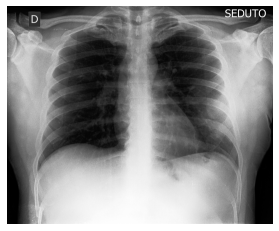

In [7]:
sample_image_path = "COVID19/02.jpeg"
sampleImage(sample_image_path)

NORMAL

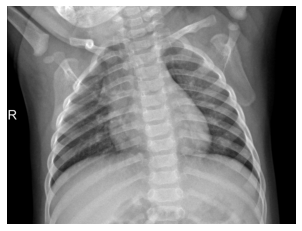

In [8]:
sample_image_path = "NORMAL/NORMAL2-IM-0749-0001.jpeg"
sampleImage(sample_image_path)

# PNEUMONIA

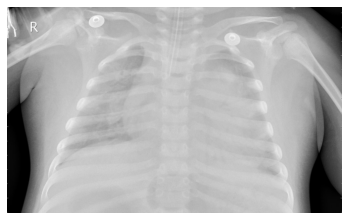

In [9]:
sample_image_path = "PNEUMONIA/person1310_bacteria_3295.jpeg"
sampleImage(sample_image_path)

TUBERCULOSIS

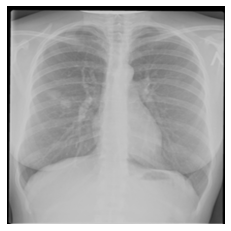

In [10]:
sample_image_path = "TUBERCULOSIS/Tuberculosis-158.png"
sampleImage(sample_image_path)

# Data Augmentation

In [11]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')


#Creating generator for Test DataSet
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 2000 images belonging to 4 classes.
Found 771 images belonging to 4 classes.


# Visualize of the Data Augmentation (Sample Images)

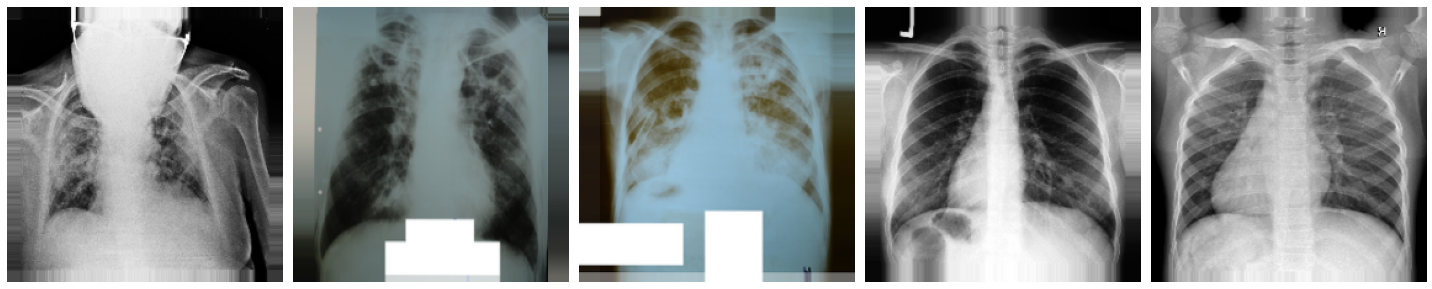

In [13]:
sample_training_images, _ = next(train_generator)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_training_images[:5])

# Building VGG19

In [14]:
vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 2s 0us/step


Layers of the VGG19

In [15]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
for layer in vgg.layers:
  layer.trainable=False

In [17]:
x=Flatten()(vgg.output)
output=Dense(numberOfClass,activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=output)

Layers of the Model

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# Visualize of the Model

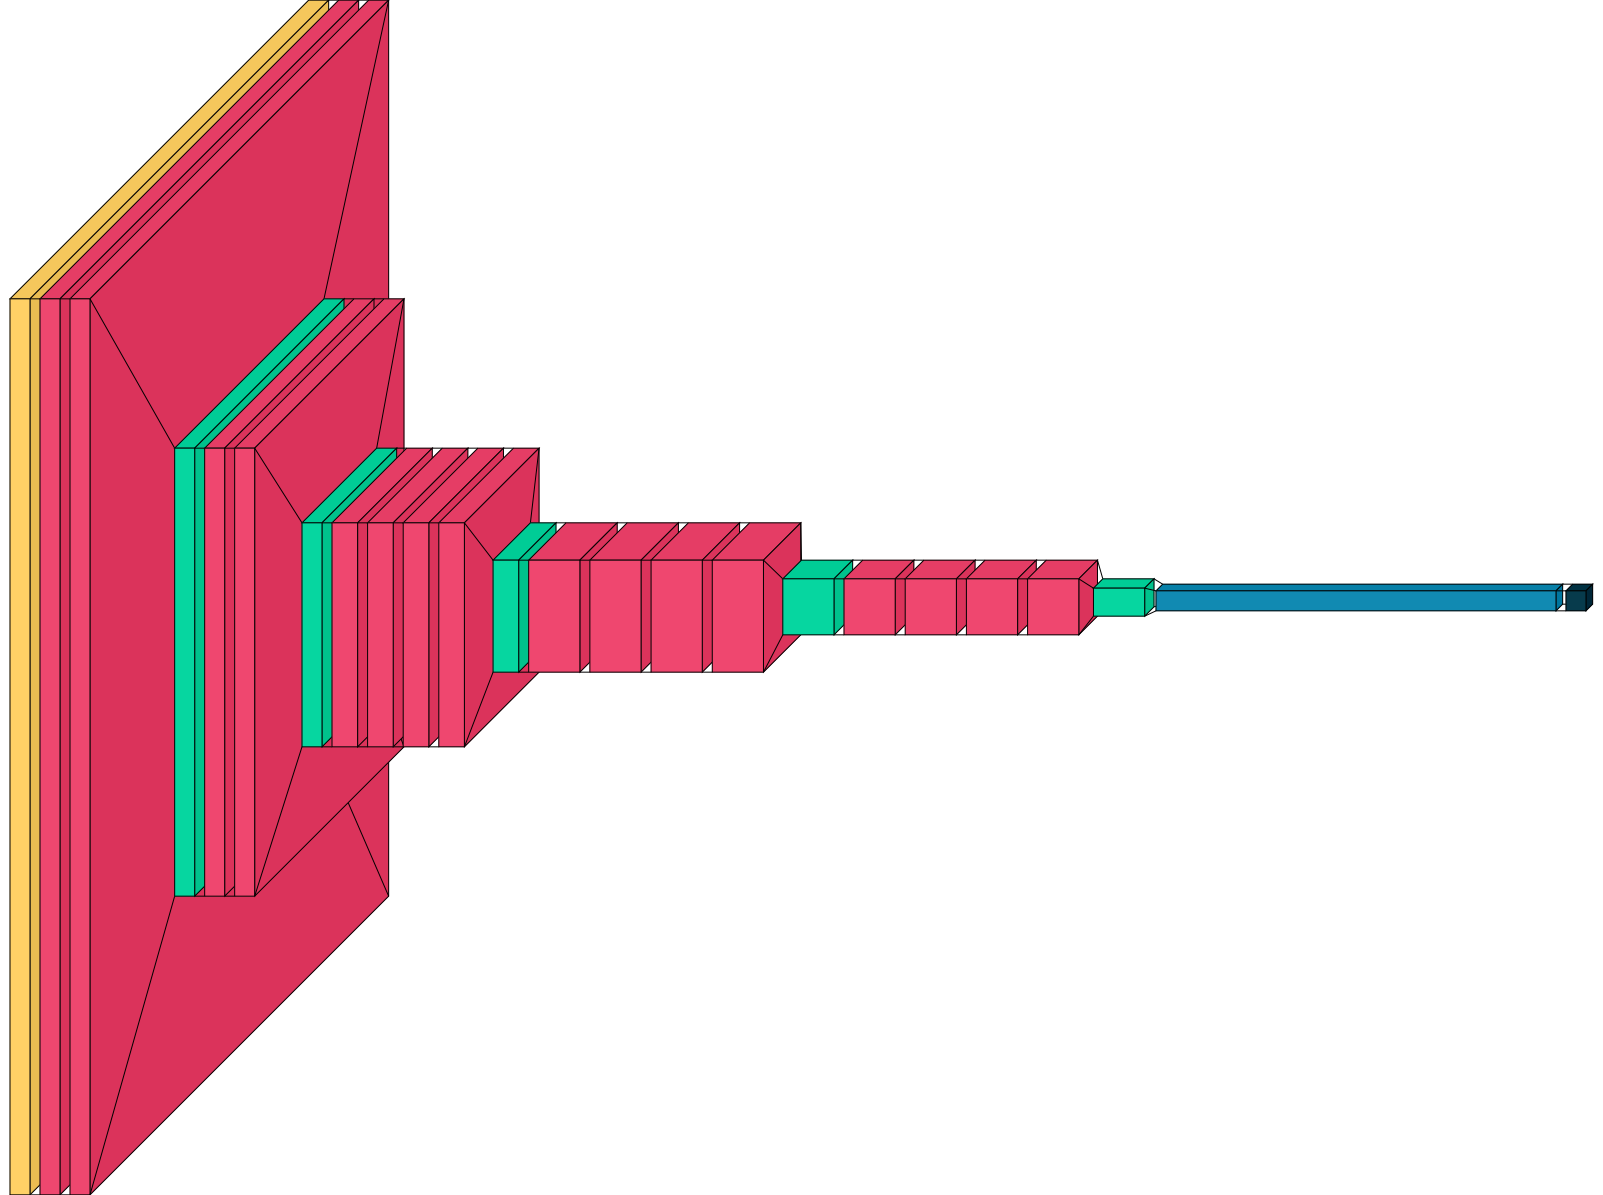

In [19]:
visualkeras.layered_view(model)

# Compiling the Model

In [20]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

# Training the Model

In [25]:
early_stop = EarlyStopping(monitor='val_loss',patience=5, verbose = 1)

In [26]:
hist = model.fit(train_generator,epochs=30,
                              validation_data=test_generator
                             )

Epoch 1/30
63/63 [==============================] - 234s 4s/step - loss: 0.7201 - accuracy: 0.7920 - val_loss: 0.4311 - val_accuracy: 0.8573
Epoch 2/30
63/63 [==============================] - 80s 1s/step - loss: 0.5548 - accuracy: 0.8440 - val_loss: 0.5210 - val_accuracy: 0.8418
Epoch 3/30
63/63 [==============================] - 80s 1s/step - loss: 0.4851 - accuracy: 0.8565 - val_loss: 0.5269 - val_accuracy: 0.8690
Epoch 4/30
63/63 [==============================] - 80s 1s/step - loss: 0.4632 - accuracy: 0.8840 - val_loss: 0.4130 - val_accuracy: 0.8703
Epoch 5/30
63/63 [==============================] - 80s 1s/step - loss: 0.3971 - accuracy: 0.8855 - val_loss: 0.6911 - val_accuracy: 0.8444
Epoch 6/30
63/63 [==============================] - 80s 1s/step - loss: 0.4332 - accuracy: 0.8915 - val_loss: 0.4797 - val_accuracy: 0.8898
Epoch 7/30
63/63 [==============================] - 80s 1s/step - loss: 0.4117 - accuracy: 0.8940 - val_loss: 0.4361 - val_accuracy: 0.8638
Epoch 8/30
63/63 [=

# Visuzalize of the Graph

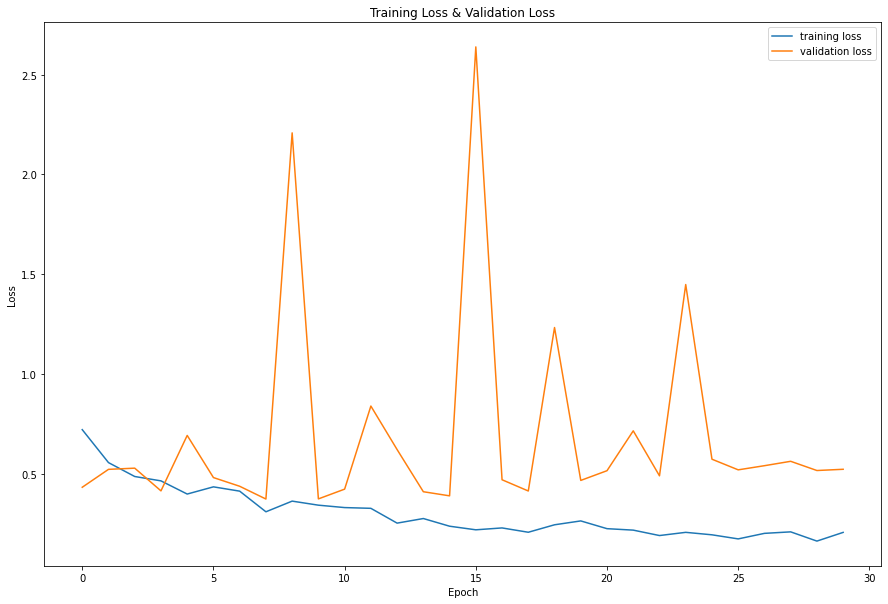

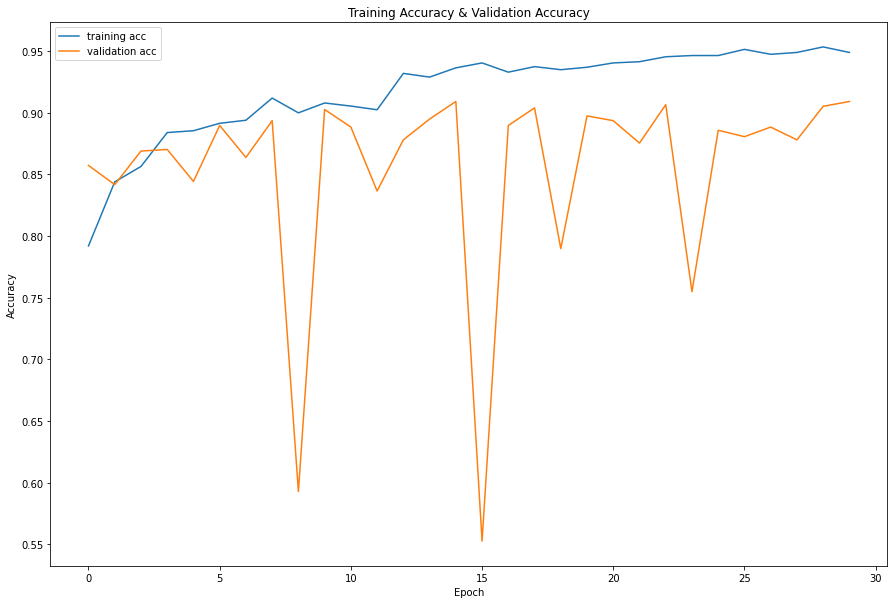

In [31]:
plt.figure(figsize=(15,10))
plt.plot(hist.history["loss"],label = "training loss")
plt.plot(hist.history["val_loss"],label = "validation loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(hist.history["accuracy"],label = "training acc")
plt.plot(hist.history["val_accuracy"],label = "validation acc")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Accuracy of the Model

In [27]:
results = model.evaluate(test_generator)

25/25 [==============================] - 13s 515ms/step - loss: 0.5213 - accuracy: 0.9092


# Model Save

In [32]:
model.save("VGG19ClassificationCovid.h5")

# Results of the Classification

In [28]:
predictions = np.argmax(model.predict(test_generator), axis = -1)
predictions

array([1, 2, 2, 1, 0, 0, 3, 0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 3,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 3, 0, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 1, 2, 1, 3, 1, 3, 1, 3, 2, 1, 2, 2, 2, 1, 1,
       2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 3, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 3, 0,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 0, 3, 1, 1, 2,
       3, 2, 2, 2, 1, 1, 0, 1, 0, 1, 3, 1, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 3, 2, 1, 1, 3, 2,
       2, 1, 2, 1, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 3, 2,
       1, 0, 2, 2, 1, 0, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 3, 0, 2,
       2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 1, 3, 2, 1, 2, 2, 1, 2, 2,
       2, 3, 2, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2,

In [29]:
print(classification_report(test_generator.classes,predictions))

              precision    recall  f1-score   support

           0       0.17      0.16      0.16       106
           1       0.28      0.24      0.26       234
           2       0.49      0.53      0.51       390
           3       0.10      0.12      0.11        41

    accuracy                           0.37       771
   macro avg       0.26      0.26      0.26       771
weighted avg       0.36      0.37      0.37       771



# CONFUSION MATRIX

In [26]:
print(train_generator.class_indices)
print(test_generator.class_indices)

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2, 'TUBERCULOSIS': 3}
{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2, 'TUBERCULOSIS': 3}


[[ 17  31  51   7]
 [ 26  56 137  15]
 [ 54 107 208  21]
 [  5   5  26   5]]


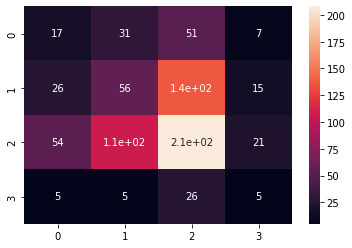

In [30]:
print(confusion_matrix(test_generator.classes,predictions))
sns.heatmap(confusion_matrix(test_generator.classes,predictions), annot = True)